In [1]:
using CSV, DataFrames

In [2]:
group_info = CSV.read("data/group_info.txt", DataFrame)
methyl = CSV.read("data/methylation_data.txt", DataFrame)
sample_info = CSV.read("data/sample_data.txt", DataFrame)[2:end, :];

In [3]:
count(sample_info[!, :age_at_initial_pathologic_diagnosis] .=== missing) # the first one

0

In [137]:
println("size of methylation_data.txt: " * string(size(methyl)))
first(methyl, 5)

size of methyl: (289508, 430)


Row,Probe,TCGA-2V-A95S,TCGA-2Y-A9GS,TCGA-2Y-A9GT,TCGA-2Y-A9GU,TCGA-2Y-A9GV,TCGA-2Y-A9GW,TCGA-2Y-A9GX,TCGA-2Y-A9GY,TCGA-2Y-A9GZ,TCGA-2Y-A9H0,TCGA-2Y-A9H1,TCGA-2Y-A9H2,TCGA-2Y-A9H3,TCGA-2Y-A9H4,TCGA-2Y-A9H5,TCGA-2Y-A9H6,TCGA-2Y-A9H7,TCGA-2Y-A9H8,TCGA-2Y-A9H9,TCGA-2Y-A9HA,TCGA-2Y-A9HB,TCGA-3K-AAZ8,TCGA-4R-AA8I,TCGA-5C-A9VG,TCGA-5C-A9VH,TCGA-5C-AAPD,TCGA-5R-AA1C,TCGA-5R-AA1D,TCGA-5R-AAAM,TCGA-BC-4072,TCGA-BC-4073,TCGA-BC-A10Q,TCGA-BC-A10Q_1,TCGA-BC-A10R,TCGA-BC-A10R_1,TCGA-BC-A10S,TCGA-BC-A10S_1,TCGA-BC-A10T,TCGA-BC-A10T_1,TCGA-BC-A10U,TCGA-BC-A10U_1,TCGA-BC-A10W,TCGA-BC-A10W_1,TCGA-BC-A10X,TCGA-BC-A10X_1,TCGA-BC-A10Y,TCGA-BC-A10Y_1,TCGA-BC-A10Z,TCGA-BC-A10Z_1,TCGA-BC-A110,TCGA-BC-A110_1,TCGA-BC-A112,TCGA-BC-A112_1,TCGA-BC-A216,TCGA-BC-A216_1,TCGA-BC-A217,TCGA-BC-A3KF,TCGA-BC-A3KG,TCGA-BC-A5W4,TCGA-BC-A69H,TCGA-BC-A69I,TCGA-BC-A8YO,TCGA-BD-A2L6,TCGA-BD-A2L6_1,TCGA-BD-A3EP,TCGA-BD-A3EP_1,TCGA-BD-A3ER,TCGA-BW-A5NO,TCGA-BW-A5NP,TCGA-BW-A5NQ,TCGA-CC-5258,TCGA-CC-5259,TCGA-CC-5260,TCGA-CC-5261,TCGA-CC-5262,TCGA-CC-5263,TCGA-CC-5264,TCGA-CC-A123,TCGA-CC-A1HT,TCGA-CC-A3M9,TCGA-CC-A3MA,TCGA-CC-A3MB,TCGA-CC-A3MC,TCGA-CC-A5UC,TCGA-CC-A5UD,TCGA-CC-A5UE,TCGA-CC-A7IE,TCGA-CC-A7IF,TCGA-CC-A7IG,TCGA-CC-A7IH,TCGA-CC-A7II,TCGA-CC-A7IJ,TCGA-CC-A7IK,TCGA-CC-A7IL,TCGA-CC-A8HS,TCGA-CC-A8HT,TCGA-CC-A8HU,TCGA-CC-A8HV,TCGA-CC-A9FS,⋯
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,cg00000029,-0.184,-2.328,1.739,-3.696,-0.655,-1.381,-1.407,-1.034,-2.167,-1.531,-1.305,-2.652,-1.808,0.403,-2.276,-3.275,-0.588,-1.682,-0.551,-3.879,1.548,-1.147,0.639,-3.136,-1.862,-0.431,-0.023,-2.335,0.639,-1.423,-1.496,-0.913,1.417,-0.663,-3.681,-0.939,-0.706,-1.179,0.956,-0.621,1.714,-0.124,-2.659,-1.021,-0.959,-0.621,-2.456,-0.743,-1.556,-1.163,-1.063,-1.091,-1.404,-0.992,0.739,-1.055,-2.53,-2.575,-0.207,-1.836,-1.532,-1.954,-0.798,1.609,-0.977,-0.477,-0.346,-1.846,1.215,0.173,-0.615,-3.648,0.631,-0.881,-0.583,0.977,-1.916,-3.517,-0.292,-0.438,-3.466,-1.439,-2.19,-0.78,-2.623,-1.463,0.184,0.345,-0.01,0.61,-3.279,-0.418,-1.336,-4.036,-3.217,-1.287,-2.069,-1.549,1.358,⋯
2,cg00000236,2.887,3.343,3.529,3.446,3.649,3.301,3.158,3.006,3.372,3.061,3.112,2.944,3.122,3.283,3.482,2.665,3.429,2.922,3.196,2.342,3.463,2.951,4.037,2.795,1.697,3.498,2.749,3.329,2.37,2.783,2.649,2.479,3.327,3.078,3.124,2.676,3.408,3.043,2.791,2.71,3.41,2.854,3.289,2.174,2.905,2.847,3.573,2.758,2.661,2.546,2.75,2.855,3.053,3.273,3.511,3.261,3.207,3.569,3.733,2.663,2.889,2.403,2.825,2.634,3.593,3.545,3.536,2.878,3.308,3.113,2.436,3.574,2.19,3.704,2.315,2.731,3.248,2.525,1.588,3.569,3.05,3.609,3.045,2.621,2.81,2.842,2.755,3.245,3.29,2.453,1.528,2.919,2.916,3.708,3.05,2.358,2.828,3.034,2.271,⋯
3,cg00000289,0.082,1.993,2.261,1.303,1.758,1.746,0.842,0.761,1.214,1.545,1.243,1.022,1.453,1.357,1.969,0.843,1.864,0.897,0.007,0.845,1.195,2.062,2.499,0.716,-0.516,0.549,0.768,2.01,0.493,1.934,1.155,0.994,1.602,0.134,0.64,0.598,1.338,1.24,1.724,1.433,1.296,1.682,1.142,0.716,1.548,1.418,1.972,1.977,-0.559,1.845,1.414,1.269,0.591,1.966,2.695,2.074,0.661,0.773,1.245,1.115,0.554,0.476,1.465,1.774,2.002,1.612,1.307,1.159,0.978,1.274,1.36,-0.031,1.961,1.566,1.132,0.245,0.873,0.685,0.661,2.003,0.831,1.595,1.374,0.169,0.706,0.996,1.467,1.507,0.68,0.439,0.892,1.179,1.737,1.315,-0.305,0.

In [138]:
println("size of sample_data.txt: " * string(size(sample_info)))
first(sample_info, 5)

size of sample_data.txt: (428, 34)


Row,V1,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,menopause_status,birth_days_to,vital_status,tumor_status,last_contact_days_to,death_days_to,cause_of_death,new_tumor_event_type,new_tumor_event_site,new_tumor_event_site_other,new_tumor_event_dx_days_to,treatment_outcome_first_course,margin_status,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
,Int64,String15,String7,Int64?,String7,String,String15,String31,String,String15,Int64?,String15,Int64?,String7,String15,Int64?,Int64?,String15,String31,String15,String,Int64?,String15,String7,String15,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64,Int64?,String15?
1,5427,TCGA-2Y-A9GS,LIHC,58,MALE,WHITE,[Discrepancy],[Not Applicable],Hepatocellular Carcinoma,G2,2006,[Not Available],-21318,Dead,WITH TUMOR,missing,724,[Not Available],Extrahepatic Recurrence,Lung,#N/A,102,[Not Available],#N/A,R0,1,724,1,724,1,102,1,102,missing
2,5428,TCGA-2Y-A9GT,LIHC,51,MALE,WHITE,Stage I,[Not Applicable],Hepatocellular Carcinoma,G2,2006,[Not Available],-18768,Dead,WITH TUMOR,missing,1624,[Not Available],Locoregional Recurrence,Liver,#N/A,1083,[Not Available],#N/A,R0,1,1624,1,1624,1,1083,1,1083,missing
3,5429,TCGA-2Y-A9GU,LIHC,55,FEMALE,WHITE,Stage I,[Not Applicable],Hepatocellular Carcinoma,G2,2009,[Not Available],-20187,Alive,TUMOR FREE,1939,missing,[Not Available],#N/A,#N/A,#N/A,missing,[Not Available],#N/A,R0,0,1939,0,1939,0,1939,0,1939,missing
4,5430,TCGA-2Y-A9GV,LIHC,54,FEMALE,WHITE,Stage I,[Not Applicable],Hepatocellular Carcinoma,G1,2007,[Not Available],-20011,Dead,WITH TUMOR,missing,2532,[Not Available],New Primary Tumor,"Other, specify",Renal met from prior lung primary,1745,[Not Available],#N/A,R0,1,2532,1,2532,0,2532,1,1745,missing
5,5431,TCGA-2Y-A9GW,LIHC,64,MALE,WHITE,Stage I,[Not Applicable],Hepatocellular Carcinoma,G2,2007,[Not Available],-23587,Dead,WITH TUMOR,missing,1271,[Not Available],Locoregional Recurrence,Liver,#N/A,1229,[Not Available],#N/A,R0,1,1271,1,1271,1,1229,1,1229,missing


In [139]:
variable_names = methyl[!, :Probe]
sample_names = names(methyl)[3:end];

In [140]:
sample_names_info = sample_info[!, :bcr_patient_barcode]
length(sample_names_info)

428

In [141]:
count(sample_names .== sort(sample_names_info))

376

In [142]:
# sample_names -> disallow duplicates using ~~_1
for (v, w) in zip(sample_names, sample_names_info)
    println("$(v==w) $v $w")
end

true TCGA-2Y-A9GS TCGA-2Y-A9GS
true TCGA-2Y-A9GT TCGA-2Y-A9GT
true TCGA-2Y-A9GU TCGA-2Y-A9GU
true TCGA-2Y-A9GV TCGA-2Y-A9GV
true TCGA-2Y-A9GW TCGA-2Y-A9GW
true TCGA-2Y-A9GX TCGA-2Y-A9GX
true TCGA-2Y-A9GY TCGA-2Y-A9GY
true TCGA-2Y-A9GZ TCGA-2Y-A9GZ
true TCGA-2Y-A9H0 TCGA-2Y-A9H0
true TCGA-2Y-A9H1 TCGA-2Y-A9H1
true TCGA-2Y-A9H2 TCGA-2Y-A9H2
true TCGA-2Y-A9H3 TCGA-2Y-A9H3
true TCGA-2Y-A9H4 TCGA-2Y-A9H4
true TCGA-2Y-A9H5 TCGA-2Y-A9H5
true TCGA-2Y-A9H6 TCGA-2Y-A9H6
true TCGA-2Y-A9H7 TCGA-2Y-A9H7
true TCGA-2Y-A9H8 TCGA-2Y-A9H8
true TCGA-2Y-A9H9 TCGA-2Y-A9H9
true TCGA-2Y-A9HA TCGA-2Y-A9HA
true TCGA-2Y-A9HB TCGA-2Y-A9HB
true TCGA-3K-AAZ8 TCGA-3K-AAZ8
true TCGA-4R-AA8I TCGA-4R-AA8I
true TCGA-5C-A9VG TCGA-5C-A9VG
true TCGA-5C-A9VH TCGA-5C-A9VH
true TCGA-5C-AAPD TCGA-5C-AAPD
true TCGA-5R-AA1C TCGA-5R-AA1C
true TCGA-5R-AA1D TCGA-5R-AA1D
true TCGA-5R-AAAM TCGA-5R-AAAM
true TCGA-BC-4072 TCGA-BC-4072
true TCGA-BC-4073 TCGA-BC-4073
true TCGA-BC-A10Q TCGA-BC-A10Q
false TCGA-BC-A10Q_1 TCGA-BC-A10Q
true 

In [143]:
# probe indexing
variable_id_dict = Dict{String, Int}()
for (i, v) in enumerate(variable_names)
    variable_id_dict[v] = i
end 

In [144]:
# group indexing
group_names = unique(group_info[:, :Group])
group_id_dict = Dict{String, Int}()
for (i, v) in enumerate(group_names)
    group_id_dict[v] = i
end

In [145]:
groups_by_variable = [Int[] for i in 1:length(variable_names)]
variables_by_group = [Int[] for i in 1:length(group_names)]
variable_names_replicated = []
for (i, g) in enumerate(eachrow(group_info))
    vid = variable_id_dict[g[1]]
    gid = group_id_dict[g[2]]
    push!(groups_by_variable[vid], gid)
    push!(variables_by_group[gid], vid)
    push!(variable_names_replicated, "$(g[2])\t$(g[1])")
end

In [146]:
variables_by_group

91834-element Vector{Vector{Int64}}:
 [238878]
 [238878]
 [37911, 43888, 97240, 121766, 138707, 157929, 236408, 241941, 268631]
 [90060]
 [35928, 51189, 191490]
 [45984, 256928]
 [45984, 256928]
 [286366]
 [6057, 19827, 25915, 37353, 47234, 288652]
 [2637]
 [6057, 6186, 10729, 19698, 19827, 23404, 24969, 25915, 26972, 35297  …  99308, 103634, 114139, 137334, 162988, 180771, 283245, 284922, 286187, 288652]
 [546, 1376, 5911, 6057, 6312, 6539, 7527, 12317, 13192, 27203  …  110884, 111748, 117681, 118410, 183682, 277001, 284408, 285171, 286892, 288652]
 [43339, 75350, 88171, 92283, 209278]
 ⋮
 [37649, 42132, 45383, 82698, 249063]
 [60712, 76241, 144582, 161170]
 [30519, 206884, 218179]
 [113173, 231449, 232490]
 [206884]
 [29807, 31181, 78723, 94738, 102702, 129557, 174048, 181125, 205436, 230763, 243112, 245508, 250108, 278120, 280040, 287630]
 [6555, 13053, 69732, 88647, 116354, 118627, 136183, 229415]
 [28881, 29842, 79285, 83630, 131484, 176672]
 [235805]
 [49488]
 [36309, 56276, 5989

In [150]:
n_variables_wo_groups = count(length.(groups_by_variable) .== 0) # variables without groups
# no variable without groups

0

In [17]:
X = transpose(Matrix(methyl[!, 3:end]))

428×289508 transpose(::Matrix{Float64}) with eltype Float64:
 -2.328  3.343   1.993   0.279  -5.953  …  -4.737  -4.611  -3.841  -4.457
  1.739  3.529   2.261   0.715  -6.021     -4.832  -4.68   -3.948  -4.794
 -3.696  3.446   1.303  -0.458  -5.908     -4.86   -4.404  -4.462  -5.539
 -0.655  3.649   1.758  -0.828  -5.868     -5.102  -5.196  -3.279  -5.336
 -1.381  3.301   1.746   1.48   -6.093     -5.191  -4.372  -3.327  -4.313
 -1.407  3.158   0.842   0.612  -6.017  …  -4.8    -4.259  -3.541  -4.141
 -1.034  3.006   0.761   0.249  -5.717     -5.158  -5.571  -4.365  -5.439
 -2.167  3.372   1.214  -1.889  -6.135     -4.866  -5.332  -4.215  -4.838
 -1.531  3.061   1.545   1.791  -5.801     -5.319  -5.131  -4.076  -5.283
 -1.305  3.112   1.243   0.74   -6.014     -4.535  -4.504  -3.986  -4.732
 -2.652  2.944   1.022   0.829  -5.68   …  -4.81   -4.169  -4.104  -4.87
 -1.808  3.122   1.453  -0.26   -5.841     -4.638  -4.056  -3.742  -4.657
  0.403  3.283   1.357   2.004  -5.756     -4.556  -

In [18]:
# clinical variables
using Statistics
normalize(x; ref=x) = (x .- mean(ref; dims=1)) ./ std(ref; dims=1)

gender = convert(Array{Float64}, map(x -> x == "MALE", sample_info[!, :gender]))
age = convert(Array{Float64}, sample_info[!, :age_at_initial_pathologic_diagnosis])

# dummy coding ethnicity
ethnicity = map(x -> x[1] == '[' ? missing : x, sample_info[!, :race])
sample_idx = ethnicity .!== missing

# 
# ethnicity = convert(Array{String}, sampleInfo[!, :Ethnicity])

# unique_ethnicity[1], unique_ethnicity[3] = unique_ethnicity[3], unique_ethnicity[1]
ethnicity_filtered = convert(Array{String}, ethnicity[sample_idx])
unique_ethnicity = unique(ethnicity_filtered)
ethnicity_dummycoded = map(ethnicity_filtered) do x
    ind = findfirst(y -> y.== x, unique_ethnicity)
    row = zeros(1, length(unique_ethnicity)-1)
    if ind != 1
        row[ind-1] = 1.0
    end
    row
end
ethnicity_dummycoded = reduce(vcat, ethnicity_dummycoded)

X_unpen = normalize([gender[sample_idx] age[sample_idx] ethnicity_dummycoded])

415×5 Matrix{Float64}:
  0.701155  -0.124066   -0.247453  -0.819612  -0.069505
  0.701155  -0.630976   -0.247453  -0.819612  -0.069505
 -1.42278   -0.341313   -0.247453  -0.819612  -0.069505
 -1.42278   -0.413729   -0.247453  -0.819612  -0.069505
  0.701155   0.310428   -0.247453  -0.819612  -0.069505
  0.701155   0.600091   -0.247453  -0.819612  -0.069505
 -1.42278    0.310428   -0.247453  -0.819612  -0.069505
 -1.42278    1.61391    -0.247453  -0.819612  -0.069505
  0.701155  -0.775808   -0.247453  -0.819612  -0.069505
  0.701155  -0.124066   -0.247453  -0.819612  -0.069505
 -1.42278    0.310428   -0.247453  -0.819612  -0.069505
  0.701155  -1.06547    -0.247453  -0.819612  -0.069505
  0.701155   0.600091    4.03143   -0.819612  -0.069505
  ⋮                                           
  0.701155  -0.0516507  -0.247453  -0.819612  -0.069505
 -1.42278    0.455259   -0.247453  -0.819612  -0.069505
  0.701155   0.889753   -0.247453   1.21715   -0.069505
 -1.42278    0.527675    4.03143  

In [19]:
count(map(x -> x in ["WHITE", "BLACK OR AFRICAN AMERICAN", "ASIAN", "AMERICAN INDIAN OR ALASKA NATIVE"], 
        sample_info[:, :race] ))

415

In [20]:
unique_ethnicity

4-element Vector{String}:
 "WHITE"
 "BLACK OR AFRICAN AMERICAN"
 "ASIAN"
 "AMERICAN INDIAN OR ALASKA NATIVE"

In [148]:
variable_names_all = [variable_names; "gender";  "age_at_diagnosis";
 "BLACK OR AFRICAN AMERICAN";
 "ASIAN";
 "AMERICAN INDIAN OR ALASKA NATIVE"]
variable_names_replicated_all = [variable_names_replicated; "gender";  "age_at_diagnosis";
 "BLACK OR AFRICAN AMERICAN";
 "ASIAN";
 "AMERICAN INDIAN OR ALASKA NATIVE"
]

370473-element Vector{Any}:
 "A1BG_1stExon\tcg22568540"
 "A1BG_5'UTR\tcg22568540"
 "A1BG_Body\tcg03123289"
 "A1BG_Body\tcg03630821"
 "A1BG_Body\tcg08389151"
 "A1BG_Body\tcg10734734"
 "A1BG_Body\tcg12461677"
 "A1BG_Body\tcg14222245"
 "A1BG_Body\tcg22286978"
 "A1BG_Body\tcg22889142"
 "A1BG_Body\tcg25623524"
 "A1BG_TSS1500\tcg07739758"
 "A1BG_TSS200\tcg02957155"
 ⋮
 "ZZZ3_TSS1500\tcg24358066"
 "ZZZ3_TSS1500\tcg24762437"
 "ZZZ3_TSS200\tcg01485247"
 "ZZZ3_TSS200\tcg02490994"
 "ZZZ3_TSS200\tcg17224732"
 "ZZZ3_TSS200\tcg17864040"
 "ZZZ3_TSS200\tcg22600394"
 "gender"
 "age_at_diagnosis"
 "BLACK OR AFRICAN AMERICAN"
 "ASIAN"
 "AMERICAN INDIAN OR ALASKA NATIVE"

In [22]:
convert(Array{String}, ethnicity[sample_idx])

415-element Vector{String}:
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "BLACK OR AFRICAN AMERICAN"
 ⋮
 "WHITE"
 "WHITE"
 "ASIAN"
 "BLACK OR AFRICAN AMERICAN"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"
 "WHITE"

In [23]:
t = convert(Array, sample_info[!, Symbol("OS.time")][sample_idx])
δ = convert(Array, sample_info[!, :OS][sample_idx]);

In [24]:
sortorder = sortperm(t; rev=true)

415-element Vector{Int64}:
   9
 184
 109
 110
 173
 157
 156
 121
 122
 260
 162
 261
 105
   ⋮
 199
 376
  55
 280
 282
 288
 311
  67
  68
  98
  99
 373

In [25]:
X = normalize((X[sample_idx, :])[sortorder, :])
X_unpen = X_unpen[sortorder, :]
X_all = [X X_unpen]
δ = δ[sortorder]
t = t[sortorder]

415-element Vector{Union{Missing, Int64}}:
 3675
 3478
 3437
 3437
 3308
 3258
 3125
 2759
 2759
 2752
 2746
 2728
 2542
    ⋮
    9
    9
    8
    6
    6
    6
    1
    0
    0
    0
    0
    0

In [26]:
using ParProx

In [27]:
ENV["CUDA_VISIBLE_DEVICES"]= 0
using CUDA, Adapt

In [81]:
lambdas = 10 .^ (range(-5, stop=-7, length=21)); # 21 values equally log-spaced in 10^-5 .. 10^-7

In [82]:
length(lambdas)

21

### **L1 penalty**

In [83]:
unpen=5
U = ParProx.COXUpdate(; maxiter=30000, step=100, tol=1e-6, verbose=true)
p = ParProx.NormL1{Float64, CuArray}(0.00001; unpen=unpen)
V = ParProx.COXVariables{Float64, CuArray}(adapt(CuArray{Float64}, X_all), 
     adapt(CuArray{Float64}, δ), adapt(CuArray{Float64}, t), 
     p);

In [89]:
using Random
Random.seed!(16962)

A = CuArray
T = Float64
U =  ParProx.COXUpdate(; maxiter=30000, step=100, tol=5e-4, verbose=false)

penalties = [ParProx.NormL1{T, A}(l; unpen=unpen) for l in lambdas]
@time scores = ParProx.cross_validate(U, adapt(Array{T}, X_all),  
    adapt(Array{T}, δ), adapt(Array{T}, t), 
    penalties, 10; T=T, A=A)

1750.429166 seconds (254.32 M allocations: 23.730 GiB, 0.33% gc time)


21×10 Matrix{Float64}:
 0.597668  0.41018   0.484756  0.641447  …  0.42623   0.423077  0.432225
 0.597668  0.41018   0.484756  0.641447     0.42623   0.423077  0.432225
 0.597668  0.41018   0.484756  0.641447     0.42623   0.423077  0.432225
 0.597668  0.41018   0.484756  0.641447     0.42623   0.423077  0.432225
 0.597668  0.41018   0.484756  0.641447     0.42623   0.423077  0.432225
 0.597668  0.404192  0.484756  0.641447  …  0.42623   0.423077  0.432225
 0.597668  0.404192  0.484756  0.641447     0.42623   0.423077  0.432225
 0.606414  0.422156  0.509146  0.532895     0.434426  0.44359   0.432225
 0.609329  0.57485   0.585366  0.503289     0.57377   0.612821  0.621483
 0.603499  0.57485   0.588415  0.503289     0.581967  0.641026  0.772379
 0.623907  0.565868  0.582317  0.516447  …  0.598361  0.646154  0.780051
 0.635569  0.550898  0.54878   0.569079     0.63388   0.651282  0.774936
 0.653061  0.553892  0.512195  0.598684     0.666667  0.641026  0.746803
 0.673469  0.57485   0.50914

In [90]:
mean(scores)

0.5721095035299595

In [91]:
std(scores)/ sqrt(10)

0.03405271281247922

In [92]:
# new cv
for i in 1:size(scores, 1)
    println(scores[i, :])
end

[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]


In [93]:
for i in 1:size(scores, 1)
    println(scores[i, :])
end

[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]
[0.597667638483965, 0.4101796407185629, 0.4847560975609756, 0.6414473684210527, 0.362116991643454, 0.43783783783783786, 0.6265984654731458, 0.4262295081967213, 0.4230769230769231, 0.4322250639386189]


In [94]:
means = mean(scores; dims=2)

21×1 Matrix{Float64}:
 0.48421355353512563
 0.48421355353512563
 0.48421355353512563
 0.48421355353512563
 0.48421355353512563
 0.4836147511399161
 0.4836147511399161
 0.4856238890802616
 0.5814174344210576
 0.6004861340802801
 0.6046535579445773
 0.6155046792618186
 0.622625196745027
 0.6306865619504544
 0.6344358832237645
 0.6378870848993407
 0.6405186657058236
 0.6400866311299955
 0.6444617146217178
 0.642326594160952
 0.6452882769486177

In [96]:
for (i,v) in enumerate(means)
    println("$i\t$v")
end

1	0.48421355353512563
2	0.48421355353512563
3	0.48421355353512563
4	0.48421355353512563
5	0.48421355353512563
6	0.4836147511399161
7	0.4836147511399161
8	0.4856238890802616
9	0.5814174344210576
10	0.6004861340802801
11	0.6046535579445773
12	0.6155046792618186
13	0.622625196745027
14	0.6306865619504544
15	0.6344358832237645
16	0.6378870848993407
17	0.6405186657058236
18	0.6400866311299955
19	0.6444617146217178
20	0.642326594160952
21	0.6452882769486177


In [97]:
standard_error = std(scores; dims=2) / sqrt(10)

21×1 Matrix{Float64}:
 0.03165964786496563
 0.03165964786496563
 0.03165964786496563
 0.03165964786496563
 0.03165964786496563
 0.03182048636722675
 0.03182048636722675
 0.026396318261867842
 0.014114381095118794
 0.023626175392631326
 0.023989024195597834
 0.025022923585435106
 0.024781733124149576
 0.026125371572640672
 0.025245893269355432
 0.024945087488544116
 0.024276003040462023
 0.02469063345493602
 0.02491380543782955
 0.024968814997465207
 0.02473393272065766

In [103]:
using Pkg
pkg"add Plots"
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.72.9+1
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Measures ───────────────────── v0.3.2
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed ConcurrentUtilities ────────── v2.2.1
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Unitful ────────────────────── v1.16.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed Formatting ─────────────────── v0.4.2
   Installed Contour ────────────────────── v0.6.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_

In [104]:
(means .- standard_error)[argmax(means)]

0.62055434422796

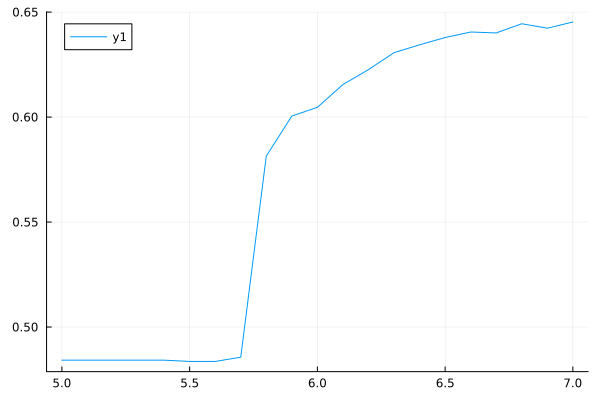

In [105]:
plot(-log10.(lambdas), means)

In [108]:
# selected_lambda = lambdas[31] when grid divided into 100 cells
selected_lambda = 1e-6 # Here force to 1e-6

1.0e-6

In [153]:
U = ParProx.COXUpdate(; maxiter=500000, step=100, tol=1e-5, verbose=true)
V = ParProx.COXVariables{Float64, CuArray}(adapt(CuArray{Float64}, X_all), 
    adapt(CuArray{Float64}, δ), adapt(CuArray{Float64}, t), 
    NormL1{Float64, CuArray}(selected_lambda; unpen=unpen); eval_obj=true);

In [154]:
@time ParProx.fit!(U, V)

100	(-1.9229893436574221, Inf, 44406.0)
200	(-1.9020759947653716, 0.007206340884860721, 35891.0)
300	(-1.8872958687791783, 0.00511902023828361, 31135.0)
400	(-1.8756065475080599, 0.004064993272896863, 27967.0)
500	(-1.8658344912655291, 0.003409846685952714, 25613.0)
600	(-1.8574077195991854, 0.002949096696472073, 23772.0)
700	(-1.8499737958231672, 0.0026084182903411512, 22311.0)
800	(-1.8433114738060845, 0.0023431558865284895, 21098.0)
900	(-1.8372578809882194, 0.0021336068386412, 19997.0)
1000	(-1.8317009624149465, 0.001962395975786163, 19070.0)
1100	(-1.8265585333419523, 0.0018193251660400351, 18254.0)
1200	(-1.8217741710945876, 0.001695515642737909, 17539.0)
1300	(-1.8172875779385915, 0.001592522251235327, 16822.0)
1400	(-1.8130612649011075, 0.001502389261910573, 16224.0)
1500	(-1.8090728419987547, 0.0014198360550575439, 15725.0)
1600	(-1.8052999472395805, 0.0013449167041430733, 15247.0)
1700	(-1.801710922207766, 0.0012810119000379557, 14778.0)
1800	(-1.7982846868564155, 0.001224405

100200	(-1.7687559787401796, 1.2954762302795647e-5, 375.0)
100300	(-1.7687202309124603, 1.2911318131818371e-5, 375.0)
100400	(-1.7686846028212768, 1.2868237554833834e-5, 375.0)
100500	(-1.768649079246364, 1.2830652746513997e-5, 374.0)
100600	(-1.7686129174208476, 1.3061351151303133e-5, 373.0)
100700	(-1.7685768341840185, 1.3033135430307372e-5, 373.0)
100800	(-1.768540872440694, 1.2989421136065306e-5, 373.0)
100900	(-1.7685050311878738, 1.2946067432176856e-5, 373.0)
101000	(-1.7684689929464619, 1.301739029903555e-5, 372.0)
101100	(-1.7684330697666075, 1.2975997233473084e-5, 372.0)
101200	(-1.7683972677205315, 1.2932409121139101e-5, 372.0)
101300	(-1.768361570675805, 1.2894646820970802e-5, 371.0)
101400	(-1.7683257317065941, 1.2946081019405092e-5, 371.0)
101500	(-1.7682900116890465, 1.2903278701568234e-5, 371.0)
101600	(-1.7682544096515862, 1.2860825701643862e-5, 371.0)
101700	(-1.7682189246329894, 1.2818718303341076e-5, 371.0)
101800	(-1.7681835556822612, 1.2776952834502782e-5, 371.0)
1

114200	(-1.7640644415425155, 1.115024033350955e-5, 343.0)
114300	(-1.7640337145153406, 1.111673385658013e-5, 343.0)
114400	(-1.7640030797592638, 1.1083473929940162e-5, 343.0)
114500	(-1.7639725365963057, 1.1050458191510596e-5, 343.0)
114600	(-1.7639420843549807, 1.1017684305833159e-5, 343.0)
114700	(-1.7639117223702314, 1.0985149961021019e-5, 343.0)
114800	(-1.7638814499833584, 1.0952852870449178e-5, 343.0)
114900	(-1.763851266541954, 1.092079077115104e-5, 343.0)
115000	(-1.7638211393817242, 1.09005462764473e-5, 342.0)
115100	(-1.763791062329796, 1.0882534623580268e-5, 342.0)
115200	(-1.7637609550280544, 1.08935983363232e-5, 341.0)
115300	(-1.763730766486698, 1.0923112237476707e-5, 341.0)
115400	(-1.7637006663704224, 1.0891236030636121e-5, 341.0)
115500	(-1.7636706540362042, 1.0859591454740214e-5, 341.0)
115600	(-1.763640728847166, 1.0828176298656516e-5, 341.0)
115700	(-1.7636108901725087, 1.0796988376128332e-5, 341.0)
115800	(-1.763581137387448, 1.0766025523287136e-5, 341.0)
115900	(-

In [155]:
println("# of selected variables: " * string(sum(V.β .!= 0)))
for (v, β) in zip(variable_names_all[V.β .!= 0], V.β[V.β .!= 0])
    println("$v\t$β")
end

# of selected variables: 786
cg00032852	-0.008086665975558288
cg00057663	1.1748108467880524e-5
cg00067768	0.001514679564424832
cg00089864	0.0024800812044670183
cg00099427	-0.012640319584382016
cg00109923	0.0026815886488927433
cg00119057	-0.02337641006420601
cg00149734	-0.04747079833757461
cg00170536	0.03191590877167492
cg00186383	0.007039329880651141
cg00191882	0.005368453981181856
cg00217461	-0.00664614447415594
cg00234625	0.011283603729344633
cg00235260	0.01408357448915778
cg00288806	-0.003540268885162599
cg00324733	-0.009472096924378358
cg00368022	-0.0021055194073854996
cg00393470	-0.010922445067097114
cg00400041	-0.013060887502730975
cg00406392	0.0010363039414975118
cg00428624	-0.0005133798726111722
cg00532901	0.001094163612044608
cg00584026	-0.0067115119921729045
cg00594866	-0.0015143619591168173
cg00610228	0.0029624031103492074
cg00615811	0.003364656181540886
cg00616687	-0.0008391736103265894
cg00704126	-0.01910076173077953
cg00716294	0.0008280951514801049
cg00717825	1.7943864032

### **Group Lasso penalty**

In [292]:
lambdas = 10 .^ (range(-6, stop=-8, length=100)); # 100 values equally log-spaced in 10^-5 .. 10^-7

In [160]:
Random.seed!(16962)

A = CuArray
T = Float64
U_group =  ParProx.COXUpdate(; maxiter=30000, step=100, tol=5e-4, verbose=true)

scores = ParProx.cross_validate(U_group, adapt(A{T}, X), adapt(A{T}, X_unpen),
    adapt(A{Int32}, δ), adapt(A{Int32}, t), 
    variables_by_group, lambdas, 5; T=T);

100	(-1.8993589883678688, Inf, 5.0)
200	(-1.899355416797007, 1.2318499625935395e-6, 5.0)
  0.616791 seconds (197.32 k allocations: 9.270 MiB)
100	(-1.8993518482048934, Inf, 5.0)
200	(-1.8993482825888073, 1.2297991612727265e-6, 5.0)
  0.598890 seconds (197.44 k allocations: 9.280 MiB)
100	(-1.8993447199460303, Inf, 5.0)
200	(-1.8993411602738495, 1.227752094017496e-6, 5.0)
  0.613810 seconds (212.81 k allocations: 9.749 MiB, 1.41% gc time)
100	(-1.8993376035695517, Inf, 5.0)
200	(-1.8993340498304272, 1.225708753614189e-6, 5.0)
  0.599694 seconds (197.44 k allocations: 9.281 MiB)
100	(-1.8993304990537696, Inf, 5.0)
200	(-1.8993269512368753, 1.2236691321596414e-6, 5.0)
  0.595528 seconds (197.44 k allocations: 9.280 MiB)
100	(-1.8993234063770426, Inf, 5.0)
200	(-1.899319864471572, 1.2216332229758024e-6, 5.0)
  0.610683 seconds (212.76 k allocations: 9.748 MiB, 1.44% gc time)
100	(-1.8993163255177685, Inf, 5.0)
200	(-1.8993127895129376, 1.2196010184653631e-6, 5.0)
  0.601454 seconds (197.32

In [161]:
means = mean(scores; dims=2)
standard_error = std(scores; dims=2) / sqrt(10);

means: [0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4982265191351255; 0.4983629447831472; 0.4983629447831472; 0.4983629447831472; 0.4983629447831472; 0.4983629447831472; 0.4983629447831472; 0.4978414323972281; 0.4978414323972281; 0.4978414323972281; 0.5000988919027695; 0.5012924825723252; 0.5017643688703861; 0.49965720786137136; 0.5062870617010032; 0.5134302793993206; 0.517518319679538; 0.5237814614483671; 0.5336953590780815; 0.545727545091711; 0.55669096846618; 0.5653172568605626; 0.5718177164932147; 0.5778511095665

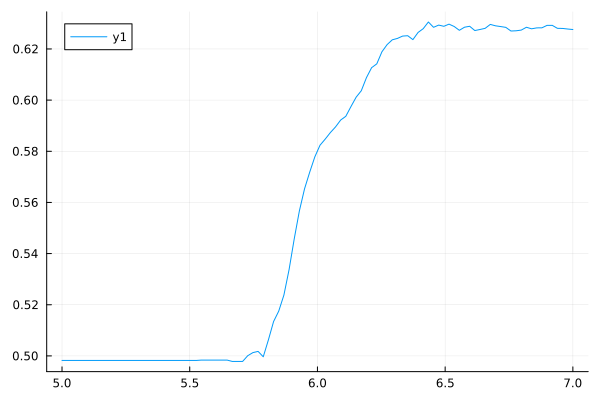

In [269]:
println("means: " * string(means))
plot(-log10.(lambdas), means)

In [293]:
selected_lambda = lambdas[argmax(means)]
# selected_lambda = lambdas[4] #when grid divided into 100 cells
# selected_lambda = 5e-7 # Here force to 1e-6

3.678379771828634e-8

In [295]:
A = CuArray
U_group = ParProx.COXUpdate(; maxiter=500000, step=100, tol=1e-5, verbose=true)
V_group = ParProx.COXVariables{Float64}(
    adapt(A{Float64}, X), adapt(A{Float64}, X_unpen),
    adapt(A{Int32}, δ), adapt(A{Int32}, t), 
    selected_lambda, variables_by_group)
@time ParProx.fit!(U_group, V_group)

100	(-1.7957602541584792, Inf, 367627.0)
200	(-1.7053909418372084, 0.033403420897055905, 366560.0)
300	(-1.638805665542922, 0.025233111010691592, 365636.0)
400	(-1.5857656801130662, 0.020512293839222324, 364640.0)
500	(-1.54176131843521, 0.01731254675987703, 363689.0)
600	(-1.5042916418224732, 0.014962185708318108, 362816.0)
700	(-1.4717979309776514, 0.01314577961151128, 361953.0)
800	(-1.443221386365839, 0.011696256741726769, 361187.0)
900	(-1.4177989607147738, 0.010514697898434651, 360355.0)
1000	(-1.3949598628173374, 0.009536317602654687, 359569.0)
1100	(-1.3742690154297723, 0.008714617953189185, 358850.0)
1200	(-1.355389555851067, 0.008015429775429964, 358083.0)
1300	(-1.3380570388491975, 0.007413213926722928, 357405.0)
1400	(-1.3220604409171277, 0.00688896707863112, 356641.0)
1500	(-1.3072286123571393, 0.006428417401098264, 355901.0)
1600	(-1.2934209929911744, 0.006020534131396606, 355161.0)
1700	(-1.2805205732375027, 0.0056567872726348035, 354400.0)
1800	(-1.2684291978909876, 0.0

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mpoptask[22m[0m[1m([22m[90mW[39m::[0mBase.InvasiveLinkedListSynchronized[90m{Task}[39m[0m[1m)[22m
    [90m   @ [39m[90mBase[39m [90m./[39m[90m[4mtask.jl:921[24m[39m
     [2] [0m[1mwait[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[90mBase[39m [90m./[39m[90m[4mtask.jl:930[24m[39m
     [3] [0m[1mwait[22m[0m[1m([22m[90mc[39m::[0mBase.GenericCondition[90m{Base.Threads.SpinLock}[39m[0m[1m)[22m
    [90m   @ [39m[90mBase[39m [90m./[39m[90m[4mcondition.jl:124[24m[39m
     [4] [0m[1m_trywait[22m[0m[1m([22m[90mt[39m::[0mTimer[0m[1m)[22m
    [90m   @ [39m[90mBase[39m [90m./[39m[90m[4masyncevent.jl:138[24m[39m
     [5] [0m[1mwait[22m
    [90m   @ [39m[90m./[39m[90m[4masyncevent.jl:155[24m[39m[90m [inlined][39m
     [6] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/.julia/packages/CUDA/tVtYo/lib/cudadrv/[39m[90m[4mstream.jl:171[24m[39m[90m [inlined][39m
     [7] [0m[1m(::CUDA.var"#838#841"{CuStream, Timer, CuDevice, Base.Event})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mCUDA[39m [90m./[39m[90m[4mthreadingconstructs.jl:258[24m[39m

In [290]:
println("# of selected variables: " * string(sum(V_group.β .!= 0)))
for (v, β) in zip(variable_names_replicated_all[V_group.β .!= 0], V_group.β[V_group.β .!= 0])
    println("$v\t$β")
end

# of selected variables: 685
AAAS_1stExon	cg02299189	0.0021188967886555635
AAAS_5'UTR	cg02299189	0.0021188967886555635
AATK_TSS1500	cg01633363	-0.0066044362910583155
AATK_TSS1500	cg09142578	-0.00594895159834972
ABCA11P_TSS1500	cg16937333	-0.001015310087250819
ABHD5_TSS1500	cg13606015	-0.0033552403871406097
ABHD5_TSS1500	cg14121103	-0.003351436960601823
ABHD5_TSS1500	cg19150852	-0.003545480367843997
ABHD5_TSS1500	cg21475256	-0.002651821607880525
ABHD5_TSS1500	cg23239109	-0.0026752845710032677
ACRC_3'UTR	cg08699828	0.004882711872287791
ACTG1_3'UTR	cg03909849	-0.006390456109788248
ACTR3B_TSS1500	cg01747547	-0.0037226388247462395
ADAM32_TSS1500	cg01565608	0.01020616993187421
ADAMTS17_TSS200	cg00235260	0.003129531167034022
ADAMTS17_TSS200	cg10971510	0.002578306398128511
ADAMTS17_TSS200	cg20578175	0.0034804916626013952
ADAMTS17_TSS200	cg20941820	0.002820751932957027
ADNP2_TSS200	cg10436594	0.005652790754660296
ADNP2_TSS200	cg24959938	0.0026646347751623878
ADPRH_TSS1500	cg17283447	-0.00539477